## Principal component Analysis in just 3 steps....

Again... we are using the iris data set

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [2]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)


df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# splitting into data (X) and class labels (Y)

X = df.iloc[:, 0:4].values
Y = df.iloc[:, 4].values

### Exploratory viz 

In [4]:
from matplotlib import pyplot as plt
%matplotlib notebook
plt.style.use('ggplot')

<IPython.core.display.Javascript object>


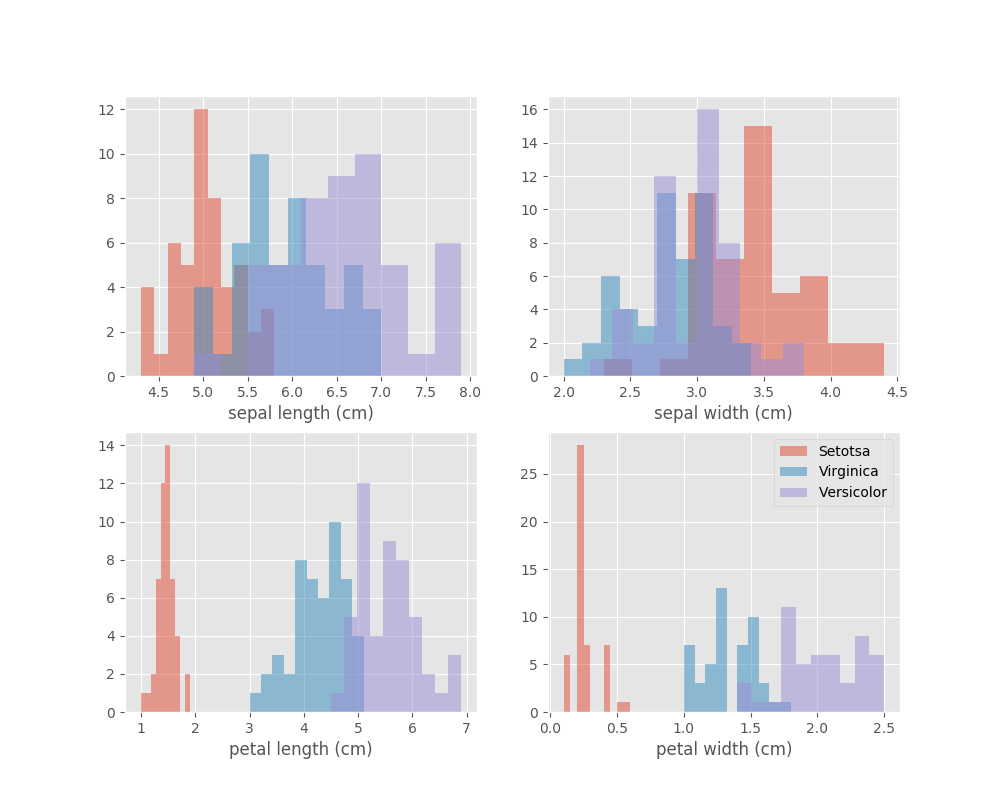

In [5]:
fig, AX = plt.subplots(2, 2, figsize =(10, 8))
ax = AX.flatten()
names = ['Setotsa', 'Virginica', 'Versicolor']
for i in range(4):
    col = df.columns[i]
    df.groupby("species")[col].hist(alpha=0.5, ax = ax[i])
    axi = ax[i]
    axi.set_xlabel(col);
    
    
plt.legend(labels = names, loc = 0);

## Satandardizing the data 

In [6]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## PCA model


In [7]:
from sklearn.decomposition import PCA as sklearnPCA
clf = sklearnPCA(n_components=2)
Y_pred = clf.fit_transform(X_std)

<IPython.core.display.Javascript object>


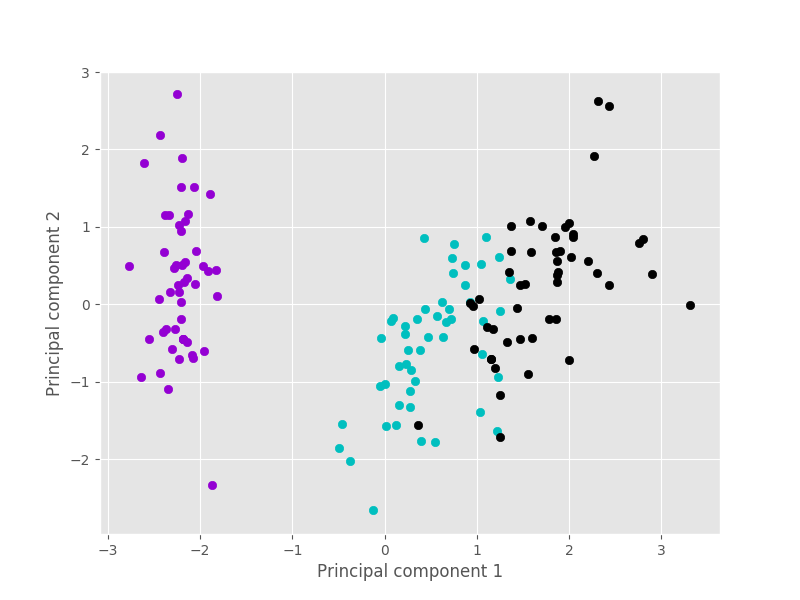

In [9]:
fig, ax = plt.subplots(figsize = (8,6))
for lab, col in zip(('setosa', 'versicolor', 'virginica'), ('darkviolet', 'c', 'black')):
    ax.scatter(Y_pred[Y==lab, 0],
              Y_pred[Y==lab, 1], label =lab, color = col)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2');